In [1]:
import pandas as pd

df = pd.read_csv('ViewingActivity.csv')

In [2]:
df.shape 

(200, 10)

In [ ]:
# Indicates that our data set has 200 rows, and 10 columns.

In [4]:
df.head() # Prints the first five rows.

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)


In [6]:
# Dropping unnecessary columns (focused on Start Time, Duration, Title)

df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)

df.head(1)

,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


In [19]:
#Converting Strings to Date-time and Timedelta in Pandas - first have to see what format the data is being stored in
df.dtypes


Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [14]:
# Let's convert. Makin sure the time zone is uniform to convert to EST time zone.
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [15]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('US/Eastern')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

,Start Time,Duration,Title
0,2013-03-20 01:17:53-04:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


In [16]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [20]:
#Filtering Strings by substring in Pandas using str.contains - we want to filter for views of only 'Office'


# create a new dataframe called office that that takes from df
# only the rows in which the Title column contains 'The Office (U.S.)'
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]


In [21]:
office.shape

(137, 3)

In [22]:
office['Duration'].sum()

Timedelta('1 days 15:00:39')

In [28]:
#Let's focus on when and what day I watch a particular show?
import matplotlib

office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour

#Check to make sure the columns were added correctly

office.head()

/tmp/ipykernel_13164/1110542179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['weekday'] = office['Start Time'].dt.weekday
/tmp/ipykernel_13164/1110542179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['hour'] = office['Start Time'].dt.hour


,Start Time,Duration,Title,weekday,hour
9,2013-03-18 19:25:36-04:00,0 days 00:00:02,The Office (U.S.): Season 5: The Duel (Episode...,0,19
10,2013-03-18 19:04:22-04:00,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...,0,19
11,2013-03-18 18:42:50-04:00,0 days 00:21:30,The Office (U.S.): Season 5: The Surplus (Epis...,0,18
12,2013-03-18 18:21:52-04:00,0 days 00:20:55,The Office (U.S.): Season 5: Frame Toby (Episo...,0,18
13,2013-03-18 18:20:53-04:00,0 days 00:00:55,The Office (U.S.): Season 5: Business Trip (Ep...,0,18


/tmp/ipykernel_13164/3197234684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['weekday'] = pd.Categorical(office['weekday'], categories=


<Axes: title={'center': 'Office Episodes Watched by Day'}, xlabel='weekday'>

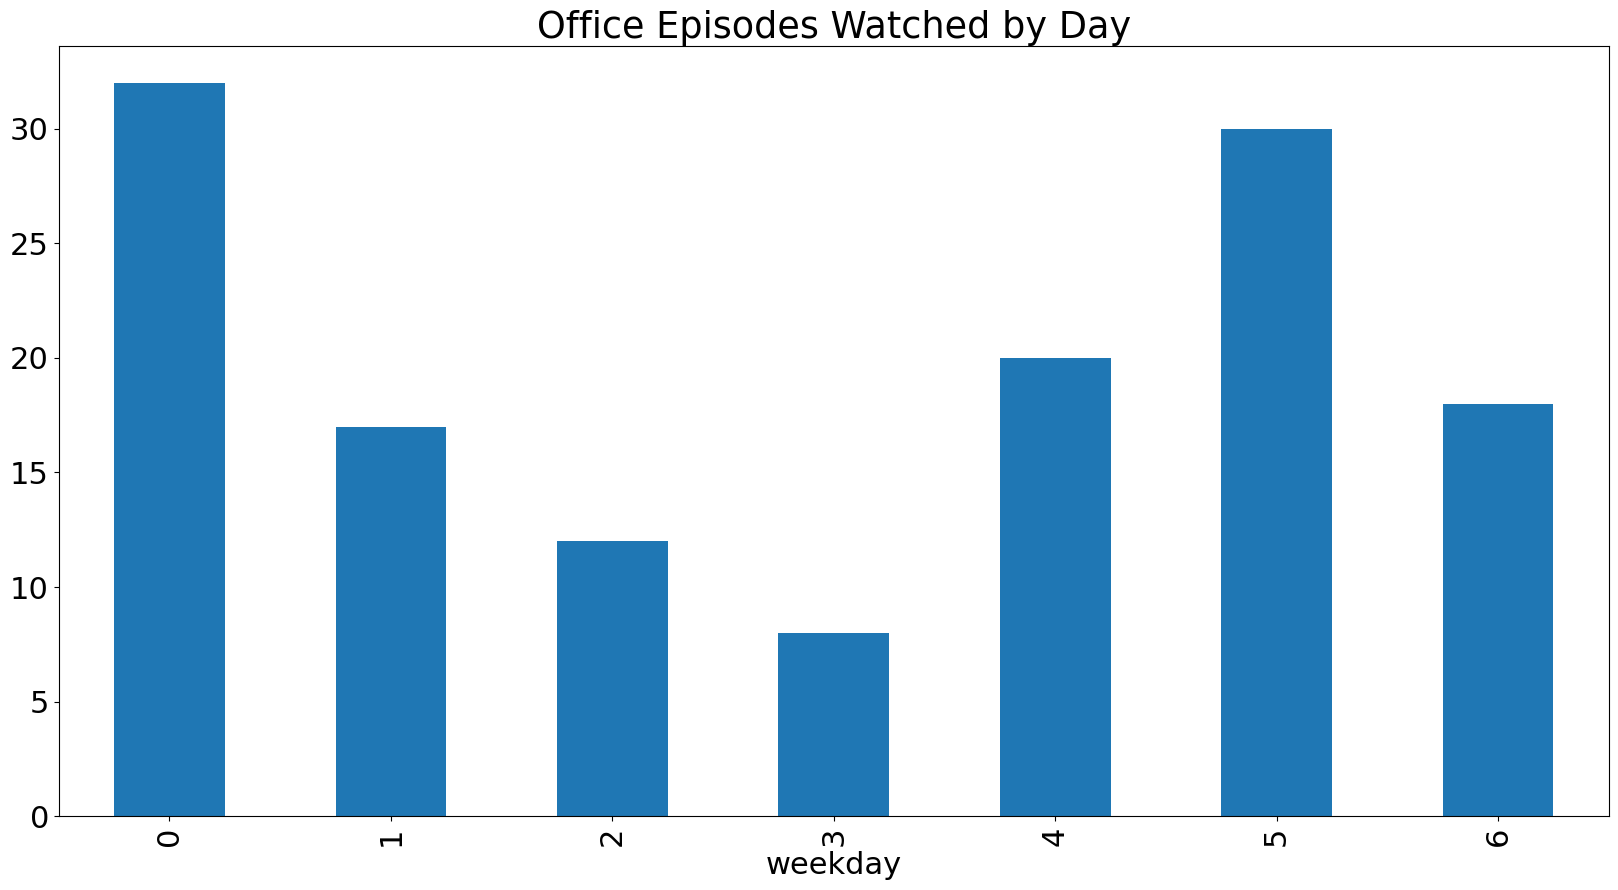

In [29]:
# set our categorical and define the order so the days are plotted Monday-Sunday
office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create office_by_day and count the rows for each weekday, assigning the result to that variable
office_by_day = office['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
office_by_day = office_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')

/tmp/ipykernel_13164/274971247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['hour'] = pd.Categorical(office['hour'], categories=


<Axes: title={'center': 'Office Episodes Watched by Hour'}, xlabel='hour'>

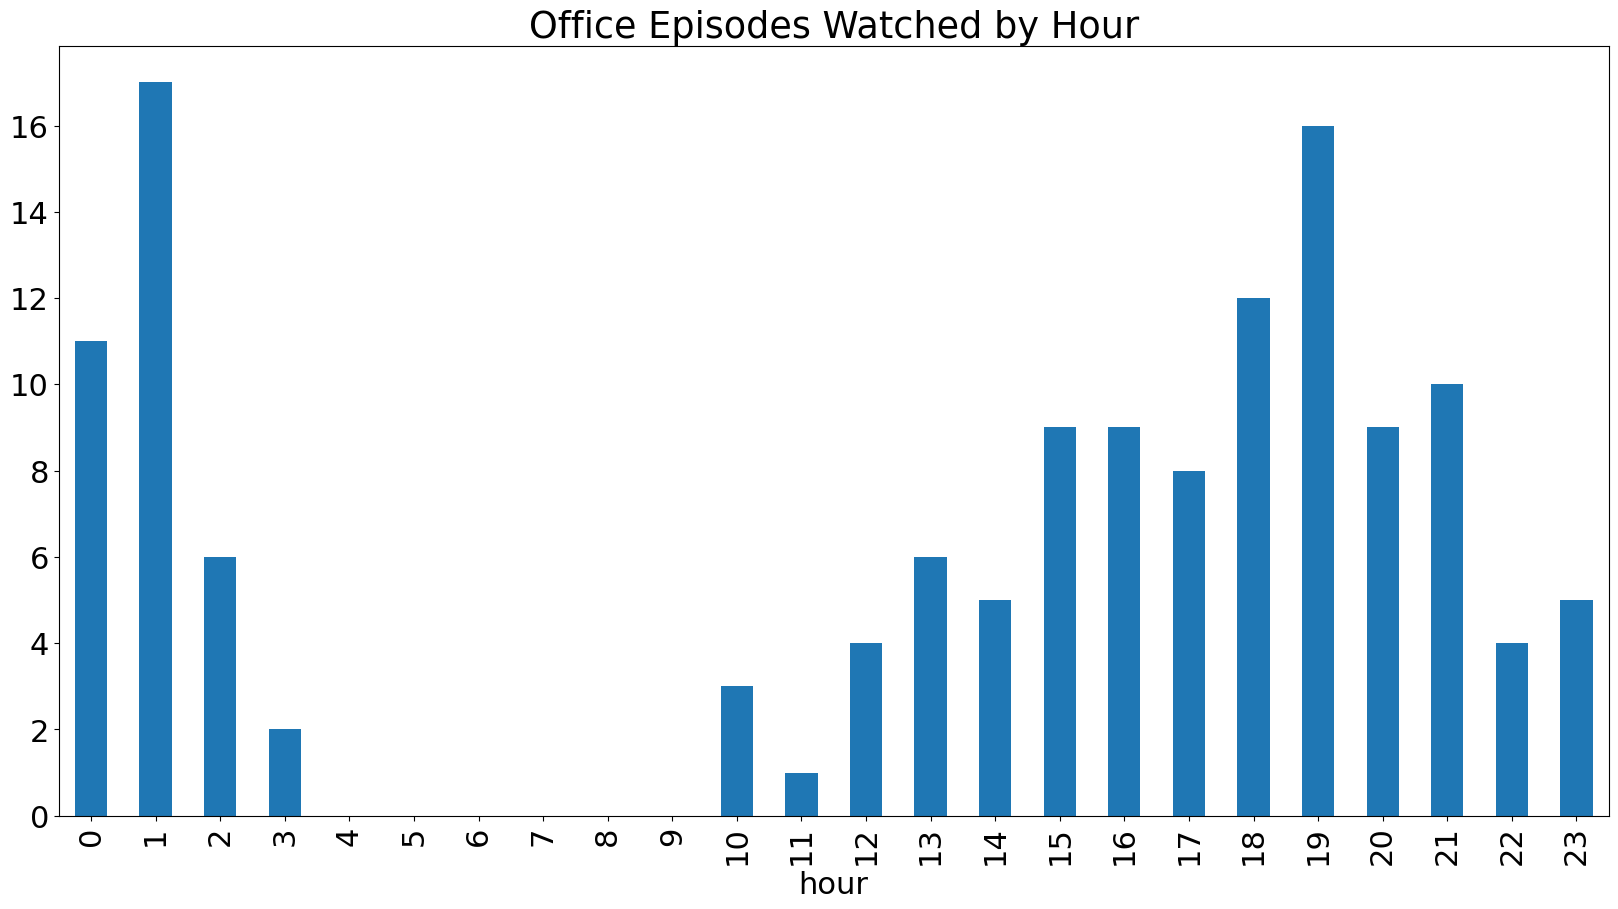

In [30]:
# set our categorical and define the order so the hours are plotted 0-23

office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create office_by_hour and count the rows for each hour, assigning the result to that variable

office_by_hour = office['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.

office_by_hour = office_by_hour.sort_index()

# plot office_by_hour as a bar chart with the listed size and title

office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')